In [352]:
import pandas as pd
df= pd.read_csv('DS_Bitácora_19_Data_con_VF.csv')

In [353]:
data_copy=df.copy()
data_KNN=df.copy()

In [354]:
import seaborn as sns

In [355]:
data_copy.fillna(round(data_copy.mean()),inplace=True)

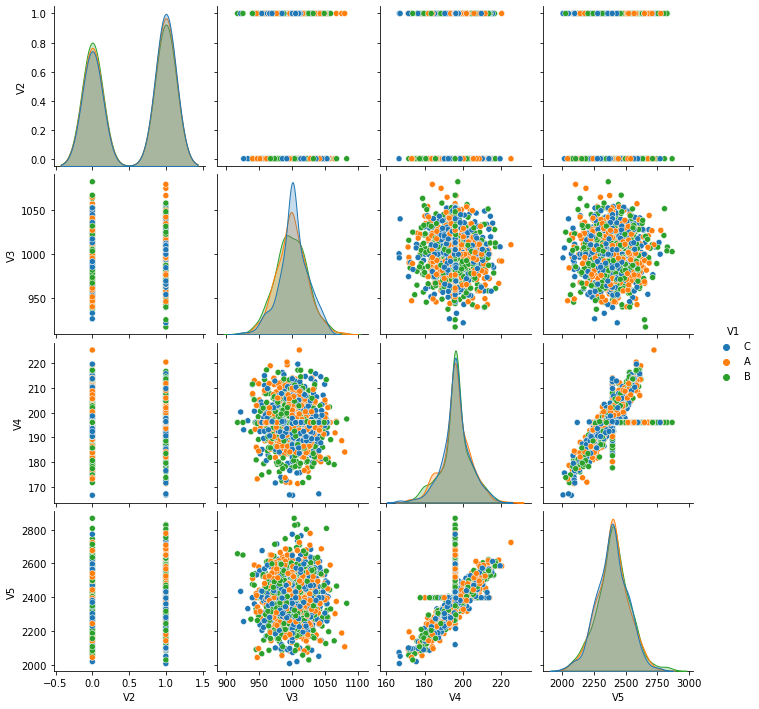

In [356]:
sns.pairplot(data=data_copy,hue='V1')

In [357]:
from sklearn.impute import KNNImputer

In [358]:
import numpy as np

In [359]:
X=data_KNN[['V4','V5']]

In [360]:
imputer=KNNImputer(n_neighbors=2)

In [361]:
impute=imputer.fit_transform(X)

In [362]:
X

,V4,V5
0,184.258917,2224.638050
1,NaN,2570.213101
2,196.893581,2309.238832
3,192.063247,2349.259233
4,NaN,2474.036357
...,...,...
1495,190.366109,2302.000694
1496,193.553401,2277.045998
1497,NaN,2347.760632
1498,196.373516,2393.847484


In [363]:
imp=pd.DataFrame(impute)
imp.head()

,0,1
0,184.258917,2224.638050
1,211.318818,2570.213101
2,196.893581,2309.238832
3,192.063247,2349.259233
4,204.565256,2474.036357


In [364]:
data_KNN.V5=imp[[1]].values
data_KNN.V4=imp[[0]].values
data_KNN.head()

,V1,V2,V3,V4,V5
0,C,1.0,986.175237,184.258917,2224.638050
1,C,1.0,994.130276,211.318818,2570.213101
2,A,1.0,985.782622,196.893581,2309.238832
3,A,1.0,1029.464887,192.063247,2349.259233
4,A,1.0,1004.357092,204.565256,2474.036357


In [365]:
data_copy.isna().sum()

V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64

In [366]:
df.isna().sum()

V1      0
V2    159
V3    104
V4    413
V5    118
dtype: int64

In [367]:
data_KNN.isna().sum()

V1      0
V2    159
V3    104
V4      0
V5      0
dtype: int64

In [368]:
X=data_KNN[['V4','V5','V3']]
imputer=KNNImputer(n_neighbors=2)
impute=imputer.fit_transform(X)

In [369]:
impv3=pd.DataFrame(impute)
impv3.head()

,0,1,2
0,184.258917,2224.638050,986.175237
1,211.318818,2570.213101,994.130276
2,196.893581,2309.238832,985.782622
3,192.063247,2349.259233,1029.464887
4,204.565256,2474.036357,1004.357092


In [370]:
data_KNN.V3=impv3[[2]].values

In [371]:
data_KNN.isna().sum()

V1      0
V2    159
V3      0
V4      0
V5      0
dtype: int64

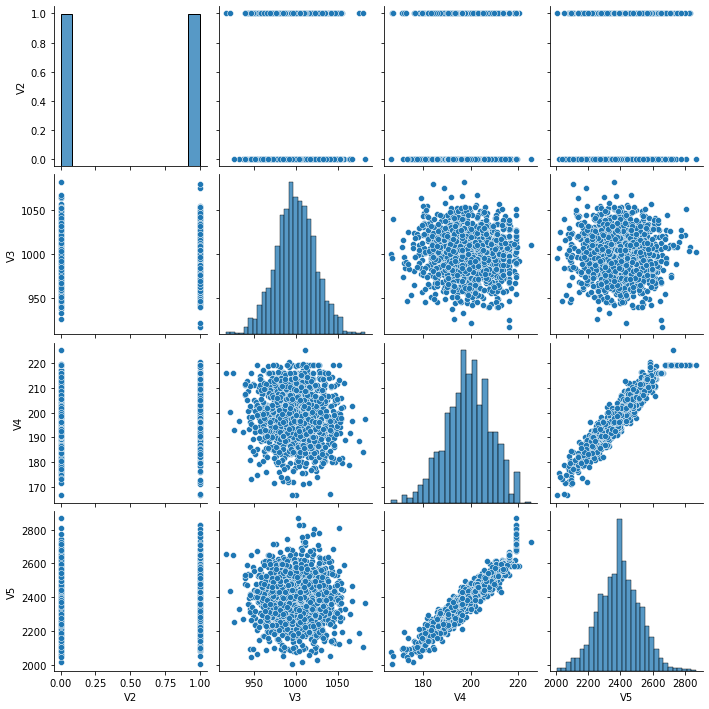

In [372]:
sns.pairplot(data=data_KNN)

In [373]:
data_KNN.head()

,V1,V2,V3,V4,V5
0,C,1.0,986.175237,184.258917,2224.638050
1,C,1.0,994.130276,211.318818,2570.213101
2,A,1.0,985.782622,196.893581,2309.238832
3,A,1.0,1029.464887,192.063247,2349.259233
4,A,1.0,1004.357092,204.565256,2474.036357


In [374]:
df.head()

,V1,V2,V3,V4,V5
0,C,1.0,986.175237,184.258917,2224.638050
1,C,1.0,994.130276,NaN,2570.213101
2,A,1.0,985.782622,196.893581,2309.238832
3,A,1.0,1029.464887,192.063247,2349.259233
4,A,1.0,1004.357092,NaN,2474.036357


In [375]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [376]:
model=linear_model.LinearRegression()

In [377]:
model.fit(X=data_KNN[['V5']],y=data_KNN[['V4']])

LinearRegression()

In [378]:
data_KNN.loc[df['V4'].isnull(),'V4_impu']=model.predict(data_KNN[['V5']])[df[['V4']].isnull()]

In [379]:
data_KNN.isna().sum()

V1            0
V2          159
V3            0
V4            0
V5            0
V4_impu    1087
dtype: int64

In [380]:
data_KNN[['V4','V4_impu']]

,V4,V4_impu
0,184.258917,NaN
1,211.318818,211.524064
2,196.893581,NaN
3,192.063247,NaN
4,204.565256,204.673372
...,...,...
1495,190.366109,NaN
1496,193.553401,NaN
1497,193.472962,195.678724
1498,196.373516,NaN


In [381]:
data_KNN.loc[df['V4'].isnull(),'V4']=model.predict(data_KNN[['V5']])[df[['V4']].isnull()]
data_KNN.drop('V4_impu',axis=1,inplace=True)

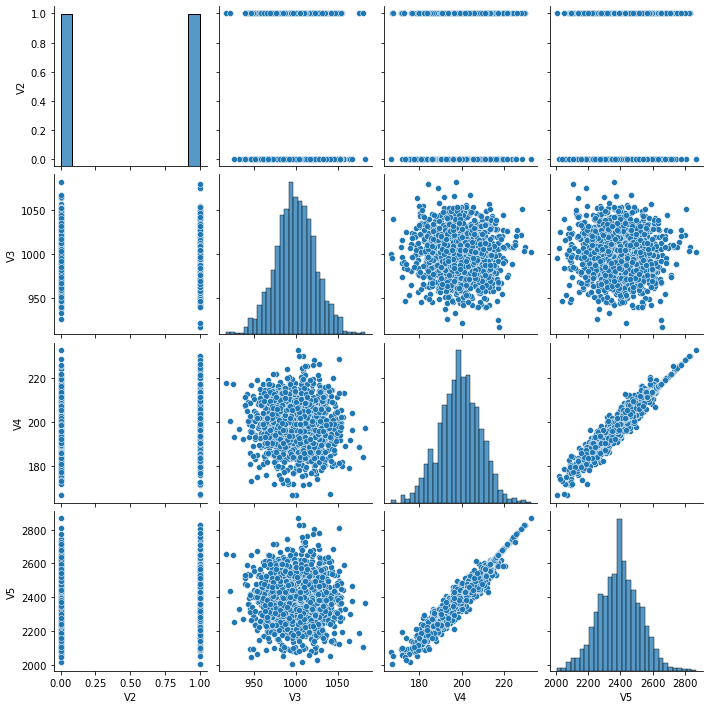

In [382]:
sns.pairplot(data=data_KNN)

In [383]:
data_KNN.isna().sum()

V1      0
V2    159
V3      0
V4      0
V5      0
dtype: int64

In [384]:
X=data_KNN[['V4','V5','V3','V2']]
imputer=KNNImputer(n_neighbors=2)
impute=imputer.fit_transform(round(X))

In [385]:
impv2=pd.DataFrame(impute)
impv2.head()

,0,1,2,3
0,184.0,2225.0,986.0,1.0
1,212.0,2570.0,994.0,1.0
2,197.0,2309.0,986.0,1.0
3,192.0,2349.0,1029.0,1.0
4,205.0,2474.0,1004.0,1.0


In [386]:
data_KNN.V2=round(impv2[[3]]).values

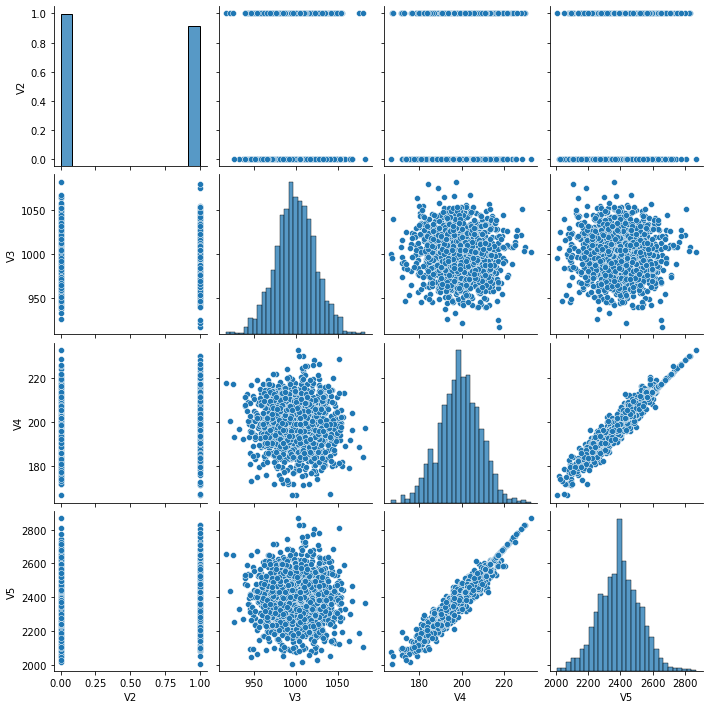

In [387]:
sns.pairplot(data=data_KNN)

In [399]:
from sklearn.neighbors import KNeighborsClassifier

In [400]:
X=data_KNN[['V3','V4','V5']]
y=data_KNN['V2']

In [401]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_KNN,random_state=0,train_size=0.7,test_size=0.3)
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [402]:
clf_kn=KNeighborsClassifier()
clf_kn.fit(X_train,y_train)

KNeighborsClassifier()

In [403]:
y_train_pred=clf_kn.predict(X_train)
y_test_pred=clf_kn.predict(X_test)

In [404]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.536

In [405]:
X1=data_copy[['V3','V4','V5']]
y1=data_copy['V2']

In [406]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_KNN,random_state=0,train_size=0.7,test_size=0.3)
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [407]:
clf_kn=KNeighborsClassifier()
clf_kn.fit(X_train,y_train)
y_train_pred=clf_kn.predict(X_train)
y_test_pred=clf_kn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.536

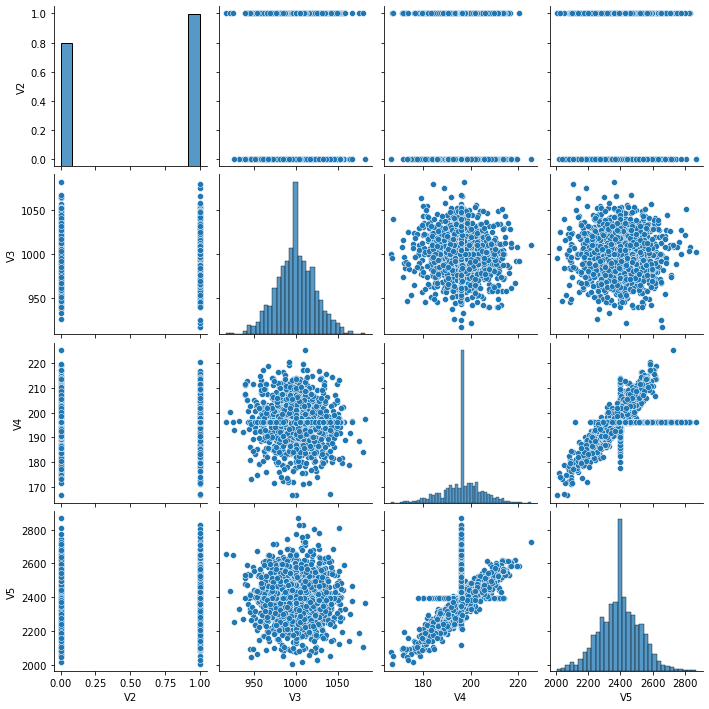

In [408]:
sns.pairplot(data=data_copy)

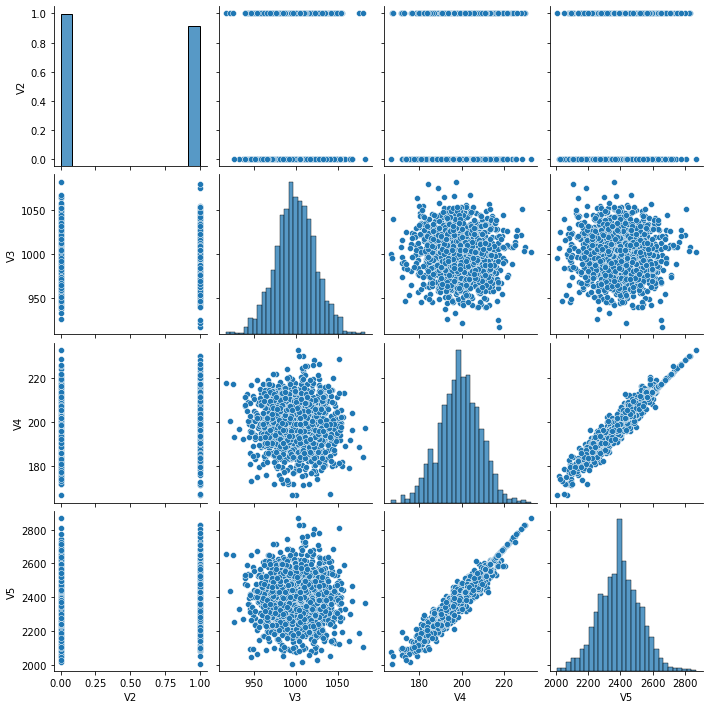

In [409]:
sns.pairplot(data=data_KNN)